In [27]:
#Importing dependencies
from wordcloud import WordCloud , STOPWORDS 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [9]:
df=pd.read_csv('Youtube-Dataset - Sheet1.csv')


QUESTION 1 : Create a word cloud from the most used words in: 
a. Video title
b. Video Tags


In [6]:
#Getting title and tags into lists
video_title=list(df['title'])
video_tags=list(df['tags'])

In [12]:
#Combining both the lists
content=str(video_title+video_tags)

In [10]:
#Setting up the configurations for the word cloud
wc=WordCloud(
    background_color='orange',
    stopwords=STOPWORDS,
    height=600,
    width=400
)

In [14]:
wc.generate(content)

In [15]:
#Creating a word cloud
wc.to_file('wordcloud.png')

QUESTION 2 : Visualize the correlation between:
a. Video duration and number of views
b. Video duration and number of likes.


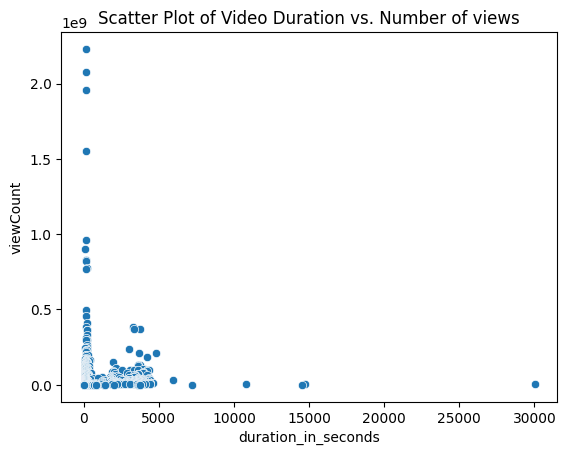

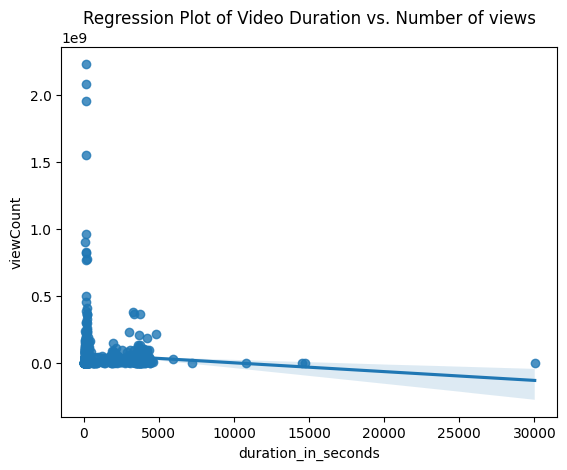

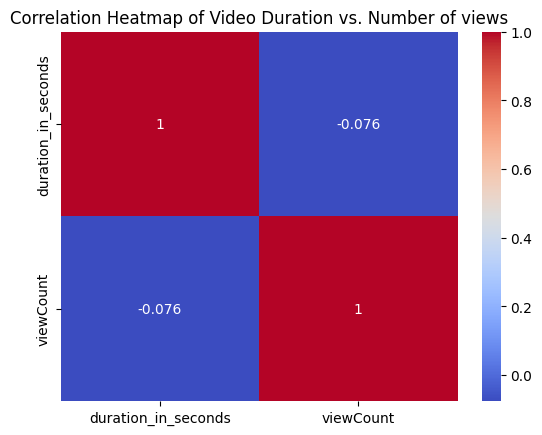

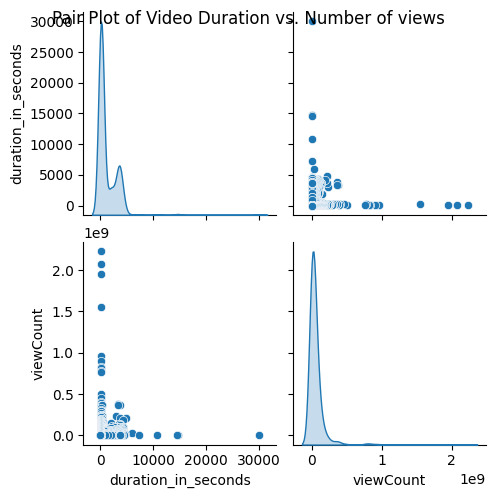

In [23]:
#Self Explainatory
sns.scatterplot(x=df["duration_in_seconds"], y=df["viewCount"], data=df)
plt.title('Scatter Plot of Video Duration vs. Number of views')
plt.show()

sns.regplot(x=df["duration_in_seconds"], y=df["viewCount"], data=df)
plt.title('Regression Plot of Video Duration vs. Number of views')
plt.show()

correlation_matrix = df[["duration_in_seconds","viewCount"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Video Duration vs. Number of views')
plt.show()

sns.pairplot(df[["duration_in_seconds","viewCount"]], diag_kind='kde')
plt.suptitle('Pair Plot of Video Duration vs. Number of views')
plt.show()

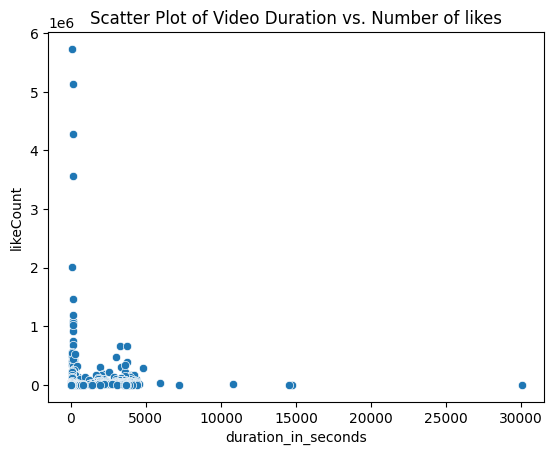

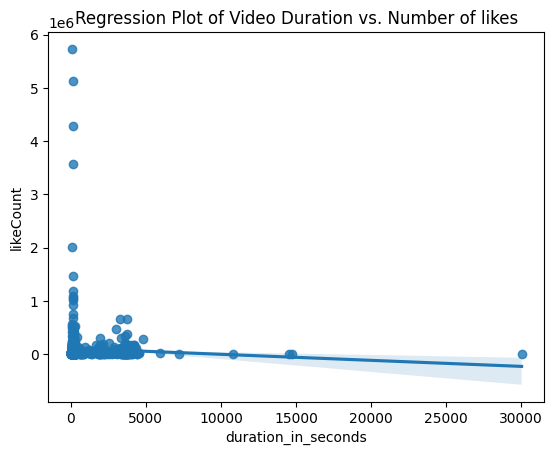

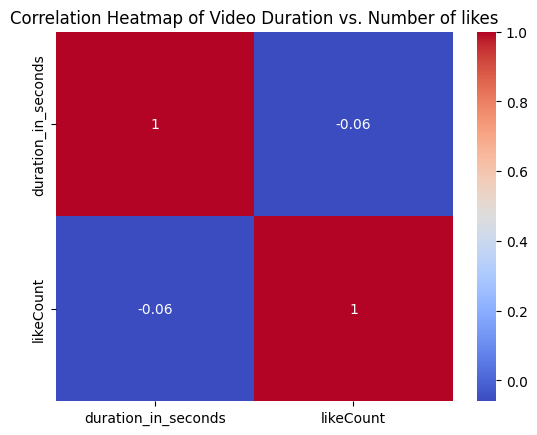

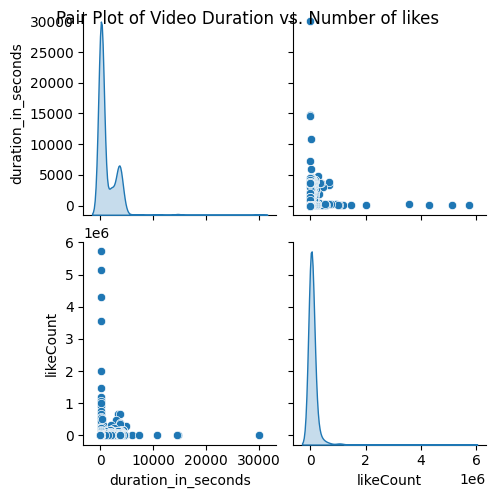

In [24]:
#Self Explainatory
sns.scatterplot(x=df["duration_in_seconds"], y=df["likeCount"], data=df)
plt.title('Scatter Plot of Video Duration vs. Number of likes')
plt.show()

sns.regplot(x=df["duration_in_seconds"], y=df["likeCount"], data=df)
plt.title('Regression Plot of Video Duration vs. Number of likes')
plt.show()

correlation_matrix = df[["duration_in_seconds","likeCount"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Video Duration vs. Number of likes')
plt.show()

sns.pairplot(df[["duration_in_seconds","likeCount"]], diag_kind='kde')
plt.suptitle('Pair Plot of Video Duration vs. Number of likes')
plt.show()

OUESTION 3 : Is there any correlation between words in tags and number of views? Like is there any word which is frequently used in most viewed videos?
a If there is a correlation - try visualizing that.

In [38]:
word_counts = Counter(tags for tags in df['tags'])

In [53]:
#Preprocessing the tags and associating each word with their respective viewCount
lst=[]
i=0
for tags in df['tags']:
    for tag in tags.split(','):
        for word in tag.split(' '):
            if word not in STOPWORDS and len(word)>0:
                lst.append({word:df['viewCount'][i]})
    i+=1

In [115]:
#Removing the duplicate words and calculating the average viewCount for those words
unique_keys = {}
for item in lst:
    for key, value in item.items():
        processed_key = key.lower().replace("'", "")
        if processed_key not in unique_keys:
            unique_keys[processed_key] = [value]
        else:
            unique_keys[processed_key].append(value)
average_values = {key: int(sum(values) / len(values)) for key, values in unique_keys.items()}



In [117]:
top_50 = sorted(average_values.items(), key=lambda x: x[1], reverse=True)[:50]

In [125]:
top_50

[('toothbrush', 2230545275),
 ('toothbrushing', 2230545275),
 ('[toddler', 2076801506),
 ('estrellita', 2076801506),
 ('donde', 2076801506),
 ('estas', 2076801506),
 ('ducklings', 1552746006),
 ('daily', 995903918),
 ('quack', 995241080),
 ('angry"', 958985097),
 ('dressed', 829916975),
 ('avocado', 819930587),
 ('asparagus', 819930587),
 ('lasagne', 819930587),
 ('lollipops', 819930587),
 ('five]', 797560902),
 ('getting', 797290407),
 ('[shoe', 774120046),
 ('(garment)', 774120046),
 ('shoe', 774120046),
 ('buckle', 774120046),
 ('(dish)', 769897868),
 ('moms', 769897868),
 ('(composition)]', 753881480),
 ('twinkle]', 729034773),
 ('["if', 653819122),
 ('[this', 649714452),
 ('(gender', 603802215),
 ('age', 603802215),
 ('specific', 603802215),
 ('name)', 603802215),
 ('your', 505169120),
 ('clothing', 493461910),
 ('frozen', 457753032),
 ('let', 457753032),
 ('go]', 457753032),
 ('"chidrens', 418977306),
 ('-', 407630407),
 ('squirrel', 407630407),
 ('snake', 407630407),
 ('way', 40

In [118]:
words, average_values = zip(*top_50)

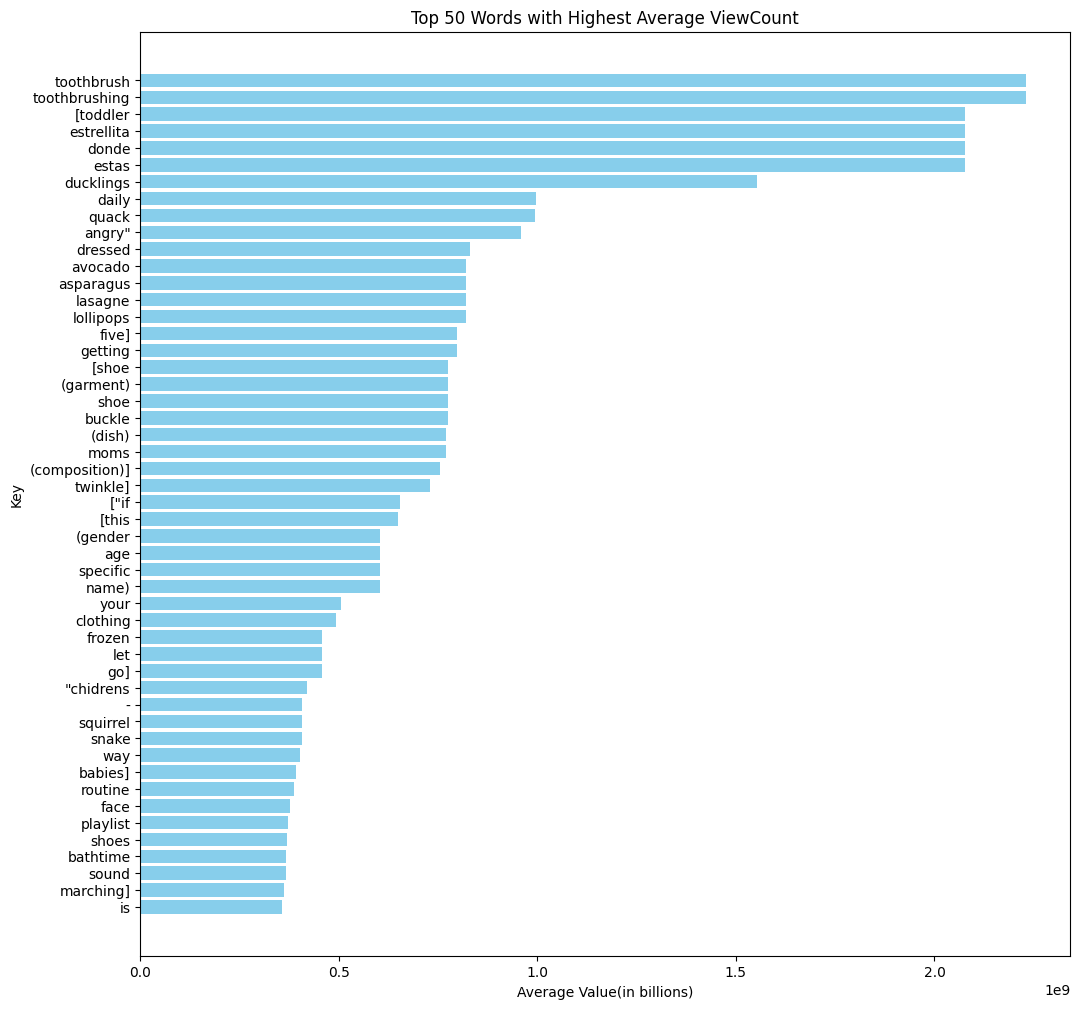

In [126]:
#Plotting top 50 words with highest average viewCount
plt.figure(figsize=(12, 12))
plt.barh(words, average_values, color='skyblue')
plt.xlabel('Average Value(in billions)')
plt.ylabel('Key')
plt.title('Top 50 Words with Highest Average ViewCount')
plt.gca().invert_yaxis()
plt.show()

QUESTION 4 : Any other insights between any columns? - This is an exploratory question - You are free to use even ML models, if required. There is no objective best answer. Any meaningful attempts will be appreciated and will be counted as a bonus in the assessment score.

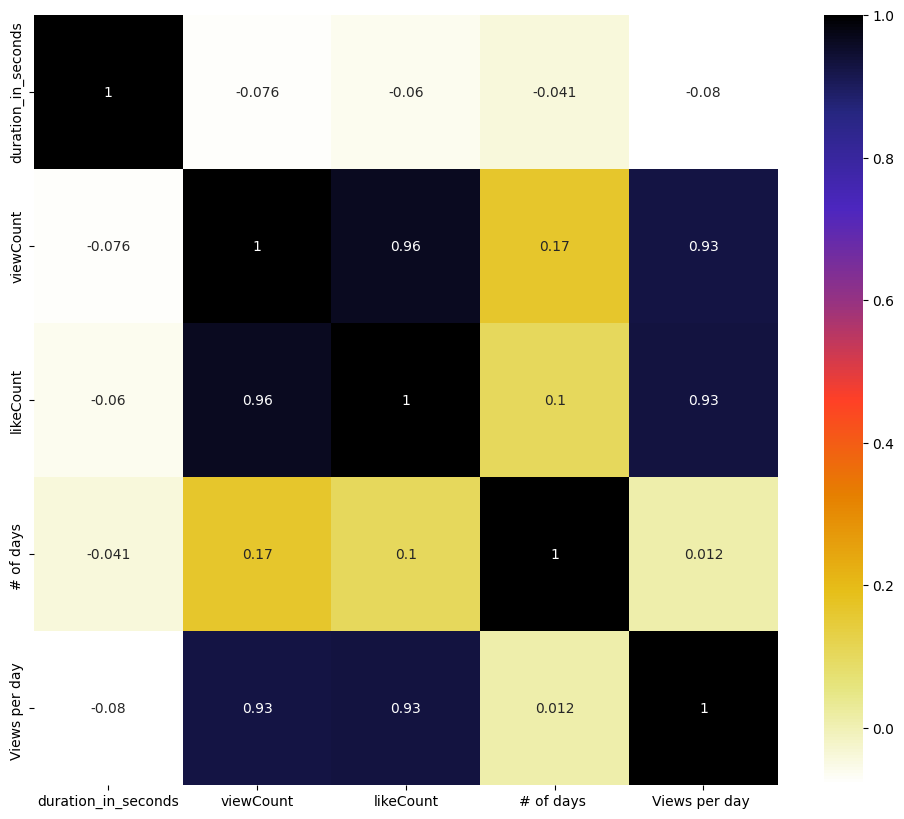

In [10]:
#Plotting the correlation matrix , for finding the correlation between Views per day ,# of days ,likeCount,viewCount and duration_in_seconds
df['# of days ']=df['# of days '].str.replace(',','').astype(int)
numeric_columns=df.drop(columns=['publishedAt','title','tags','Date of release '],axis=1)
plt.figure(figsize=(12,10))
correlation_matrix=numeric_columns.corr()
sns.heatmap(correlation_matrix,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()


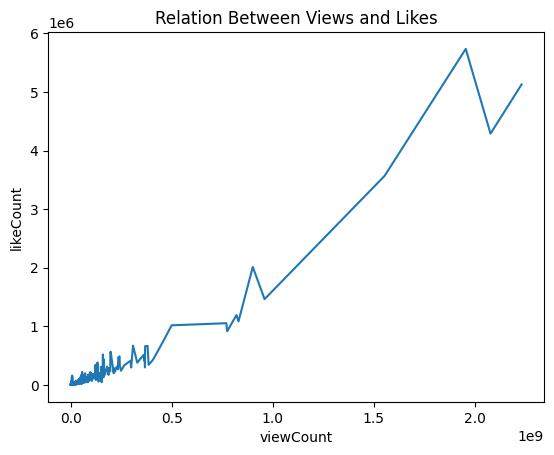

In [14]:
#Visualizing the relation between views and likes
plt.plot(df['viewCount'],df['likeCount'])
plt.title('Relation Between Views and Likes')
plt.xlabel('viewCount')
plt.ylabel('likeCount')
plt.show()

In [24]:
df['likeCount']=df['likeCount'].fillna(-1)

In [29]:
#Importance of features while predicting the likeCount
X = df[['Views per day ', '# of days ', 'viewCount', 'duration_in_seconds']]
y = df['likeCount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X, y)

RandomForestRegressor(random_state=42)

In [31]:
feature_importance=model.feature_importances_
importance_df=pd.DataFrame({'Feature':X.columns,'Importance':feature_importance})
importance_df=importance_df.sort_values(by='Importance',ascending=False)
importance_df

,Feature,Importance
2,viewCount,0.587012
0,Views per day,0.380276
3,duration_in_seconds,0.016356
1,# of days,0.016356


In [32]:
#Importance of features while predicting the viewCount
X = df[['Views per day ', '# of days ', 'likeCount', 'duration_in_seconds']]
y = df['viewCount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X, y)

RandomForestRegressor(random_state=42)

In [33]:
feature_importance=model.feature_importances_
importance_df=pd.DataFrame({'Feature':X.columns,'Importance':feature_importance})
importance_df=importance_df.sort_values(by='Importance',ascending=False)
importance_df

,Feature,Importance
2,likeCount,0.591533
0,Views per day,0.380671
1,# of days,0.019484
3,duration_in_seconds,0.008312


In [51]:
#Calcualting average views on each day
df['Date'] = pd.to_datetime(df['Date of release '])
df['Day_of_Week'] = df['Date'].dt.strftime('%A')

SundayViews=df[['Day_of_Week','viewCount']][df['Day_of_Week']=='Sunday']
MondayViews=df[['Day_of_Week','viewCount']][df['Day_of_Week']=='Monday']
TuesdayViews=df[['Day_of_Week','viewCount']][df['Day_of_Week']=='Tuesday']
WednesdayViews=df[['Day_of_Week','viewCount']][df['Day_of_Week']=='Wednesday']
ThursdayViews=df[['Day_of_Week','viewCount']][df['Day_of_Week']=='Thursday']
FridayViews=df[['Day_of_Week','viewCount']][df['Day_of_Week']=='Friday']
SaturdayViews=df[['Day_of_Week','viewCount']][df['Day_of_Week']=='Saturday']


In [52]:
averageViewsOnEachDay=[SundayViews['viewCount'].mean(),MondayViews['viewCount'].mean(),TuesdayViews['viewCount'].mean(),WednesdayViews['viewCount'].mean(),ThursdayViews['viewCount'].mean(),FridayViews['viewCount'].mean(),SaturdayViews['viewCount'].mean()]
ViewsOnEachDay=pd.DataFrame({'Day':df['Day_of_Week'].unique(),'AverageViews':averageViewsOnEachDay})
ViewsOnEachDay=ViewsOnEachDay.sort_values(by='AverageViews',ascending=False)
ViewsOnEachDay

,Day,AverageViews
0,Wednesday,2.969216e+08
3,Friday,9.447385e+07
4,Saturday,5.967866e+07
5,Monday,5.612664e+07
6,Tuesday,3.858194e+07
2,Thursday,3.091411e+07
1,Sunday,2.933085e+07


In [ ]:
#From the above dataframe we can conclude that we get most views on Wednesday